# Parte III: Aprendizaje supervisado con scikit-learn

# 1. Introducción

* Queremos construir un modelo usando los datos de entrenamiento que pueda **generalizar** datos que el modelo "no haya visto"
* Si un modelo es capaz de hacer predicciones precisas en datos no vistos decimos que ha *generalizado a partir de los datos de entrenamiento*
* Una forma de estimar qué tan buena será la generalización es dividir nuestro conjuntos de datos en dos: uno para entrenamiento (training set) y otro para evaluación (test set)

# 1. Introducción (II)

* Otro factor a tomar en cuenta es la complejidad del modelo (que depende del espacio de hipótesis $H$)
* Un modelo muy complejo es capaz de "memorizar los datos" por lo que se desempeñará bien en los datos de entrenamiento pero no en los de evaluación (este problema se conoce como **overfitting**
* Por otro lado, un modelo muy simple no será capaz de capturar toda la información contenida en los datos por lo que el desempeño será malo tnato en los datos de entrenamiento como en los de evaluación (**underfitting**)

# 2. Entrenando un primer modelo

* Usaremos el dataset iris, hacer un clasificador con este conjunto de datos es como el Hello World! en programación
* El conjunto de datos contiene 150 observaciones de 3 tipos de flores con medidas de altura y ancho para pétalo y sépalo, así como la clase a la que pertenece la flor (setosa, versicolour o virginica)
* Para mayor información sobre los datos ver: http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/

# 2. Entrenando un primer modelo (II)

![iris-flower](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal-278x300.png)

Fuente: http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/

# 2. Entrenando un primer modelo (III)

In [2]:
# configuramos matplotlib para incluir las gráficas en jupyter e importamos pandas
%matplotlib inline
import pandas as pd

In [3]:
# cargamos los datos en un data frame de pandas
url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=names)

# veamos como lucen las primeras observaciones
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# obtenemos los valores del data frame, esto nos regresará
# arreglos de numpy
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['class'].values

from sklearn.model_selection import train_test_split

# partimos los datos en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 2. Entrenando un primer modelo (IV)

In [31]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.98


In [32]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

from sklearn_evaluation import ClassifierEvaluator

ce = ClassifierEvaluator(clf, y_test, y_pred, y_score,
                         df.columns,
                        ['setosa', 'versicolor', 'virginica'])

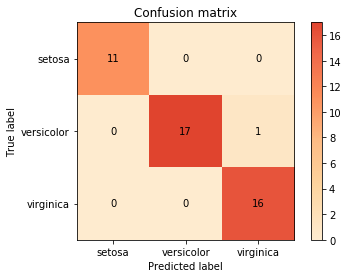

In [33]:
cm = ce.confusion_matrix

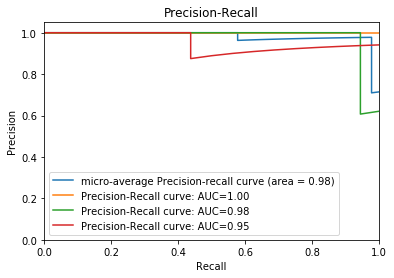

In [34]:
ce.precision_recall

# 2. Entrenando un primer modelo (V)

* En este primer ejemplo ignoramos muchas cuestiones que se tienen que tomar en cuenta en proyectos reales
* Los datos **casi nunca** están en un formato aceptable por lo que hay que cambiar formato, exportarlos a una base de datos, etc
* Una vez que tenemos los datos en formato aceptable el siguiente paso importante es limpiarlos, por lo general los datos van a contener errores (mal formato, nombres de columnas incorrectos, errores de captura, etc).
* Cuando tenemos los datos limpios necesitamos trabajar en otro problema: datos faltantes. Es normal que en nuestros datos haya faltantes y existen muchas técnicas para trabajar con ellos, desde borrar filas/columnas con datos faltantes hasta algoritmos para llenarlos, algunos algoritmos de ML pueden trabajar con datos faltantes pero otros no
* Una vez que tenemos los datos limpios y completos se suele recurrir a un preprocesamiento, entre las operaciones más comunes se encuentra transformar la escala de los datos, esto ayuda a ciertos algoritmos a tener un mejor desempeño


# 3. Un ejemplo un poco más difícil

* Ahora veremos otro ejemplo de aprendizaje supervisado con datos que se asemejan un poco más a lo que encontraríamos en un proyecto real
* Trabajaremos con los datos del Titanic disponibles en https://www.kaggle.com/c/titanic

# 3.1 Datos

* En este conjunto de datos tenemos obervaciones sobre algunos de los pasajeros del Titanic incluida una variable que indica si el pasajero sobrevivió o no
* Usaremos los datos para modelar la sobrevivencia dada la información que tenemos sobre el pasajero
* Más información sobre los datos disponible en https://www.kaggle.com/c/titanic/data

# 3.2 Limpieza de datos

# 3.2 Entrenamiento

# 3.3 Cross-validation

# 3.4 Bias-Variance tradeoff

# 3.5 Entrando más modelos

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# 3.6 Optimizando hiperparámetros

# 3.7 Feature engineering

# Lectura recomendada

*Domingos, P. A Few Useful Things to Know about Machine Learning*

https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf